In [1]:
from keras.models import Sequential, Model, load_model, model_from_json
from keras import layers
from keras.layers import Activation
from keras.layers import Input
import keras
from keras.datasets import mnist
from keras import regularizers, callbacks
import sys
sys.path.append('C:/Users/320060820/experiments/')
from train_model import *
# from inception_model import get_model
import copy

import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# to restart layer numbering
from keras import backend as K
K.clear_session()

Using TensorFlow backend.


In [2]:
save_path = '../test_models/'
num_classes = 10
epochs = 20
reduced_training_size_factor = 1
batch_size = 64
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [3]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(300))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, y_test))
model.save(save_path + 'mnist_dense_3layer.h5')

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/step - loss: 0.3434 - acc: 0.8981 - val_loss: 0.1410 - val_acc: 0.9584
Epoch 2/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1700 - acc: 0.9492 - val_loss: 0.0961 - val_acc: 0.9718
Epoch 3/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1306 - acc: 0.9592 - val_loss: 0.0819 - val_acc: 0.9753
Epoch 4/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.1099 - acc: 0.9663 - val_loss: 0.0682 - val_acc: 0.9776
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0952 - acc: 0.9691 - val_loss: 0.0681 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.0883 - acc: 0.9725 - val_loss: 0.0643 - val_acc: 0.9784
Epoch 7/20
60000/60000 [==============================] - 3s 57us/step - loss: 0

In [6]:
weights = np.append(model.layers[2].get_weights()[0], model.layers[2].get_weights()[1])
weights = np.append(weights, model.layers[-1].get_weights()[0])
weights = np.append(weights, model.layers[-1].get_weights()[1])

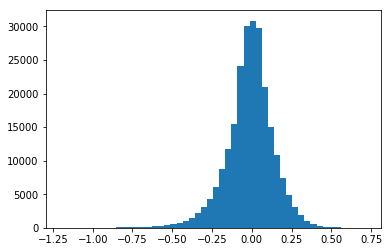

In [7]:
plt.hist(weights, bins=50);

### 4 layer dense network

In [8]:
model = Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, y_test))
model.save(save_path + 'test_models/mnist_custom/mnist_dense_4layer.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.3767 - acc: 0.8844 - val_loss: 0.1340 - val_acc: 0.9573
Epoch 2/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1814 - acc: 0.9447 - val_loss: 0.0926 - val_acc: 0.9714
Epoch 3/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1459 - acc: 0.9547 - val_loss: 0.0796 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 4s 66us/step - loss: 0.1225 - acc: 0.9620 - val_loss: 0.0748 - val_acc: 0.9775
Epoch 5/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1101 - acc: 0.9655 - val_loss: 0.0651 - val_acc: 0.9784
Epoch 6/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.1068 - acc: 0.9660 - val_loss: 0.0688 - val_acc: 0.9796
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0923 - acc: 0.9710 - val_loss: 0.0628 - val_acc

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total para

### Custom CNN for MNIST

In [15]:
pmodel = Sequential()
pmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.Conv2D(32, (3, 3), activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.AveragePooling2D(pool_size=(2, 2)))
pmodel.add(layers.Dropout(0.25))

pmodel.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.AveragePooling2D(pool_size=(2, 2)))
pmodel.add(layers.Dropout(0.25))

pmodel.add(layers.GlobalAveragePooling2D())
pmodel.add(layers.Dropout(0.25))
pmodel.add(layers.Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.001)

pmodel.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [18]:
history = pmodel.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, y_test))
pmodel.save(save_path + 'mnist_cnn_simple.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.2663 - acc: 0.9358 - val_loss: 0.0811 - val_acc: 0.9766
Epoch 2/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0736 - acc: 0.9791 - val_loss: 0.0641 - val_acc: 0.9821
Epoch 3/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0566 - acc: 0.9828 - val_loss: 0.0368 - val_acc: 0.9877
Epoch 4/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0452 - acc: 0.9863 - val_loss: 0.0376 - val_acc: 0.9857
Epoch 5/20
60000/60000 [==============================] - 16s 272us/step - loss: 0.0428 - acc: 0.9873 - val_loss: 0.0339 - val_acc: 0.9887
Epoch 6/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0394 - acc: 0.9883 - val_loss: 0.0249 - val_acc: 0.9911
Epoch 7/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0361 - acc: 0.9888 - val_loss: 0.

In [19]:
pmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
average_pooling2d_3 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [22]:
amodel = Sequential()
amodel.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
amodel.add(layers.Activation('relu'))
amodel.add(layers.BatchNormalization())
amodel.add(layers.Conv2D(32, (3, 3)))
amodel.add(layers.Activation('relu'))
amodel.add(layers.BatchNormalization())
amodel.add(layers.AveragePooling2D(pool_size=(2, 2)))
amodel.add(layers.Dropout(0.25))

amodel.add(layers.Conv2D(64, (3, 3), padding='same'))
amodel.add(layers.Activation('relu'))
amodel.add(layers.BatchNormalization())
amodel.add(layers.Conv2D(64, (3, 3)))
amodel.add(layers.Activation('relu'))
amodel.add(layers.BatchNormalization())
amodel.add(layers.AveragePooling2D(pool_size=(2, 2)))
amodel.add(layers.Dropout(0.25))

amodel.add(layers.GlobalAveragePooling2D())
amodel.add(layers.Dropout(0.25))
amodel.add(layers.Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam(lr=0.001)

amodel.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

In [24]:
len(amodel.layers), len(pmodel.layers)

(19, 15)

In [26]:
amodel.set_weights(pmodel.get_weights())

In [27]:
amodel.evaluate(x_test, y_test, verbose=0)

[0.016879658109934827, 0.9948]

In [28]:
amodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 32)        0         
__________

In [31]:
amodel.save(save_path + 'test_models/mnist_custom/mnist_cnn_simple_sepact.h5')

### CNN MNIST

In [4]:
pmodel = Sequential()
pmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.Conv2D(32, (3, 3), activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.MaxPooling2D(pool_size=(2, 2)))
pmodel.add(layers.Dropout(0.25))

pmodel.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
pmodel.add(layers.BatchNormalization())
pmodel.add(layers.MaxPooling2D(pool_size=(2, 2)))
pmodel.add(layers.Dropout(0.25))

# pmodel.add(layers.Flatten())
pmodel.add(layers.GlobalMaxPooling2D())
pmodel.add(layers.Dropout(0.25))
pmodel.add(layers.Dense(num_classes, activation='softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001)

pmodel.compile(loss='categorical_crossentropy',
             optimizer = opt,
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
history = pmodel.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True, 
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 287us/step - loss: 2.9201 - acc: 0.4229 - val_loss: 0.2562 - val_acc: 0.9374
Epoch 2/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.8857 - acc: 0.7502 - val_loss: 0.1367 - val_acc: 0.9631
Epoch 3/20
60000/60000 [==============================] - 16s 259us/step - loss: 0.5296 - acc: 0.8465 - val_loss: 0.0960 - val_acc: 0.9735
Epoch 4/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.3653 - acc: 0.8937 - val_loss: 0.0754 - val_acc: 0.97930.3678 - acc - ETA: 0s - loss: 0.3666 - acc: 0
Epoch 5/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.2914 - acc: 0.9154 - val_loss: 0.0627 - val_acc: 0.9835: 0.2945 - 
Epoch 6/20
60000/60000 [==============================] - 15s 256us/step

In [6]:
pmodel.save(save_path + 'mnist_custom/mnist_keras.h5')